In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,4796,INN04797,3,0,0,2,Meal Plan 1,0,Room_Type 4,36,2018,7,20,Online,0,0,0,159.3,2,Not_Canceled
1,22601,INN22602,2,0,0,2,Meal Plan 1,0,Room_Type 1,86,2017,9,9,Corporate,0,0,0,100.0,0,Not_Canceled
2,775,INN00776,2,0,1,3,Meal Plan 1,0,Room_Type 1,59,2018,8,29,Online,0,0,0,109.8,1,Not_Canceled
3,5850,INN05851,2,0,0,1,Meal Plan 1,0,Room_Type 1,9,2017,9,11,Online,0,0,0,105.0,2,Not_Canceled
4,22097,INN22098,2,0,1,2,Meal Plan 1,0,Room_Type 1,86,2018,5,20,Offline,0,0,0,65.0,1,Not_Canceled


In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=["Unnamed: 0", "Booking_ID"], inplace=True)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,3,0,0,2,Meal Plan 1,0,Room_Type 4,36,2018,7,20,Online,0,0,0,159.3,2,Not_Canceled
1,2,0,0,2,Meal Plan 1,0,Room_Type 1,86,2017,9,9,Corporate,0,0,0,100.0,0,Not_Canceled
2,2,0,1,3,Meal Plan 1,0,Room_Type 1,59,2018,8,29,Online,0,0,0,109.8,1,Not_Canceled
3,2,0,0,1,Meal Plan 1,0,Room_Type 1,9,2017,9,11,Online,0,0,0,105.0,2,Not_Canceled
4,2,0,1,2,Meal Plan 1,0,Room_Type 1,86,2018,5,20,Offline,0,0,0,65.0,1,Not_Canceled


In [6]:
df.shape

(29020, 18)

In [7]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(7631)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(21389, 18)

In [11]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [12]:
df["market_segment_type"].value_counts()

market_segment_type
Online           16336
Offline           3500
Corporate         1177
Complementary      301
Aviation            75
Name: count, dtype: int64

#### Our Data Is Imbalanced

In [13]:
cat_cols = [
    "type_of_meal_plan",
    "required_car_parking_space",
    "room_type_reserved",'market_segment_type', 'repeated_guest', 'booking_status'
]


num_cols = [
    "no_of_adults",
    "no_of_children",
    "no_of_weekend_nights",
    "no_of_week_nights",
    "lead_time",
    "arrival_year",
    "arrival_month",
    "arrival_date", 
    'no_of_previous_bookings_not_canceled',
    'avg_price_per_room', 'no_of_special_requests',
]

### Data Analysis

In [14]:
data = df.copy()
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,3,0,0,2,Meal Plan 1,0,Room_Type 4,36,2018,7,20,Online,0,0,0,159.3,2,Not_Canceled
1,2,0,0,2,Meal Plan 1,0,Room_Type 1,86,2017,9,9,Corporate,0,0,0,100.0,0,Not_Canceled
2,2,0,1,3,Meal Plan 1,0,Room_Type 1,59,2018,8,29,Online,0,0,0,109.8,1,Not_Canceled
3,2,0,0,1,Meal Plan 1,0,Room_Type 1,9,2017,9,11,Online,0,0,0,105.0,2,Not_Canceled
4,2,0,1,2,Meal Plan 1,0,Room_Type 1,86,2018,5,20,Offline,0,0,0,65.0,1,Not_Canceled


### Univariate analysis

In [15]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))
    if len(num_features)==1:
        axes = [axes]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(
            data=df,
            x=column,
            ax=axes[i][1],
            palette="Blues"
        )
        axes[i][1].set_title(f"Boxplot for {column}")
    plt.tight_layout()
    plt.show()

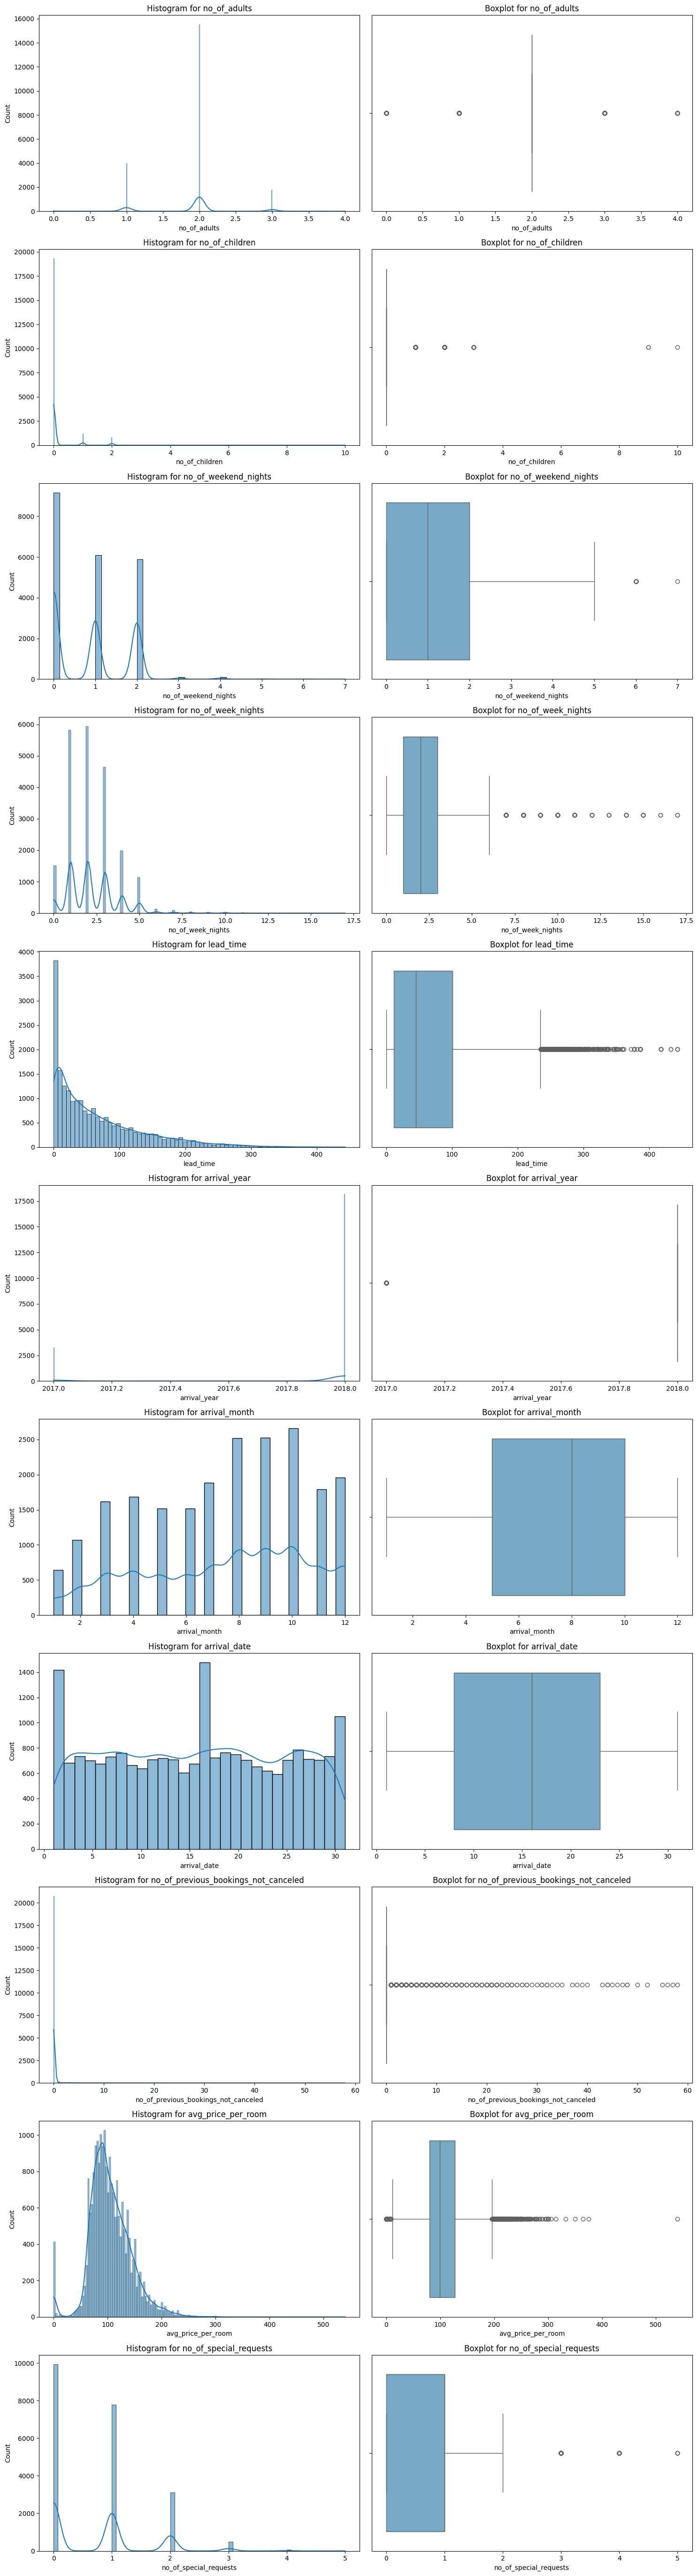

In [16]:
num_plot_dist(data, num_cols)

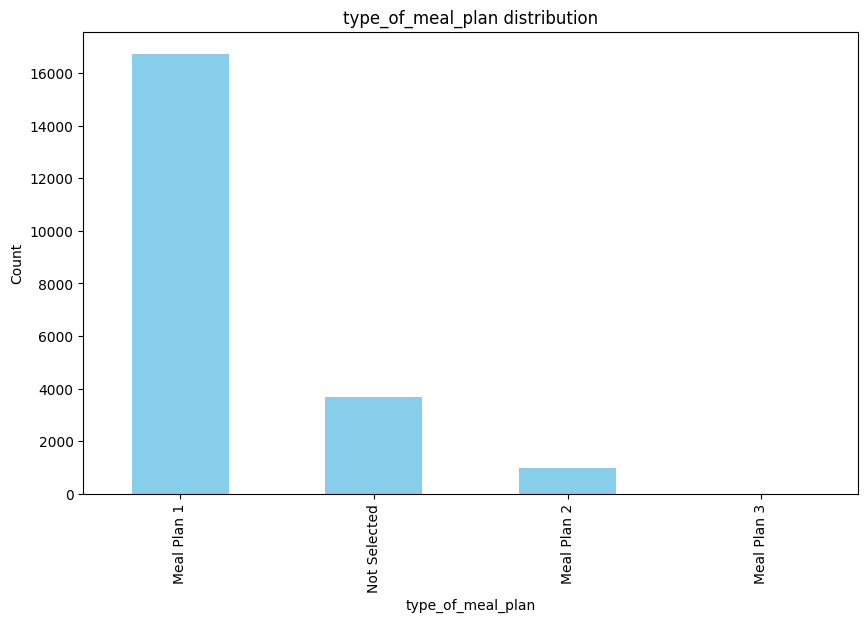

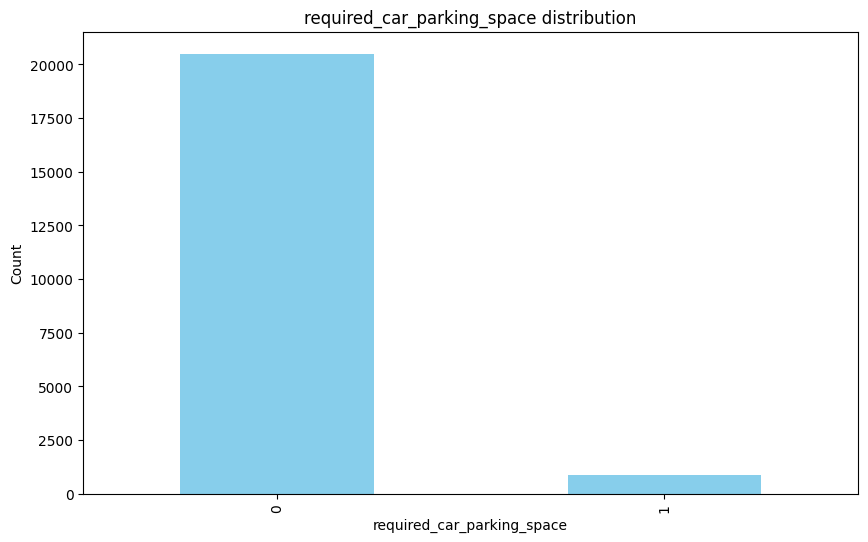

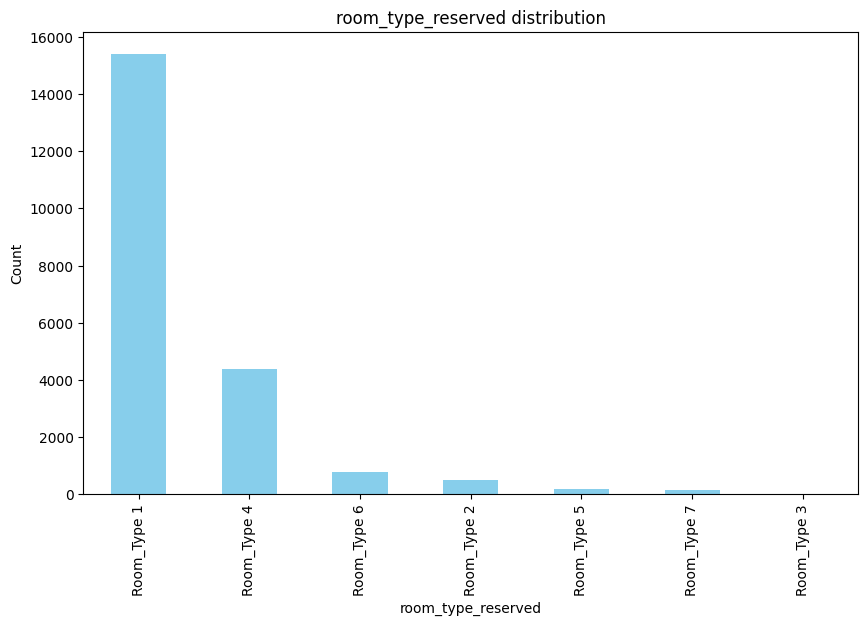

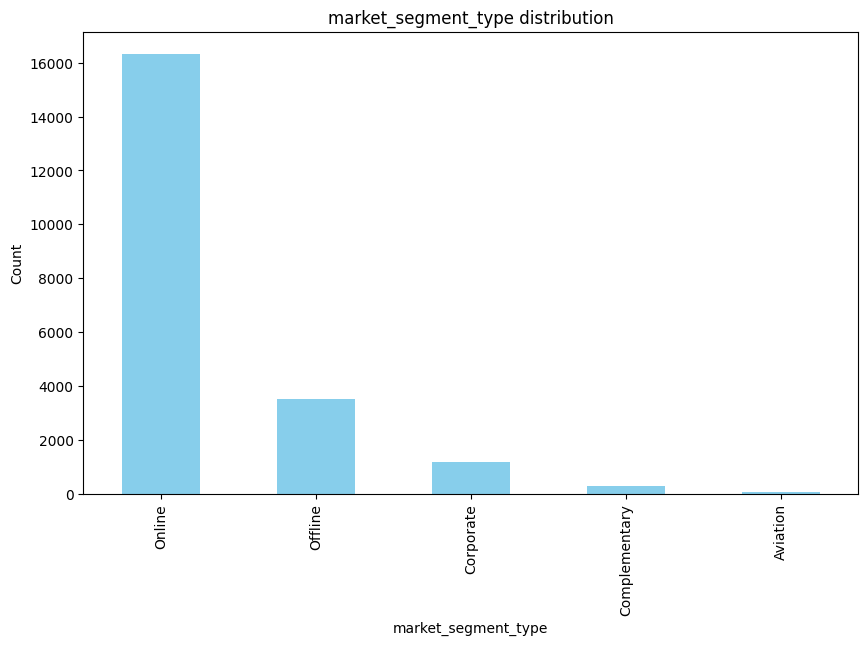

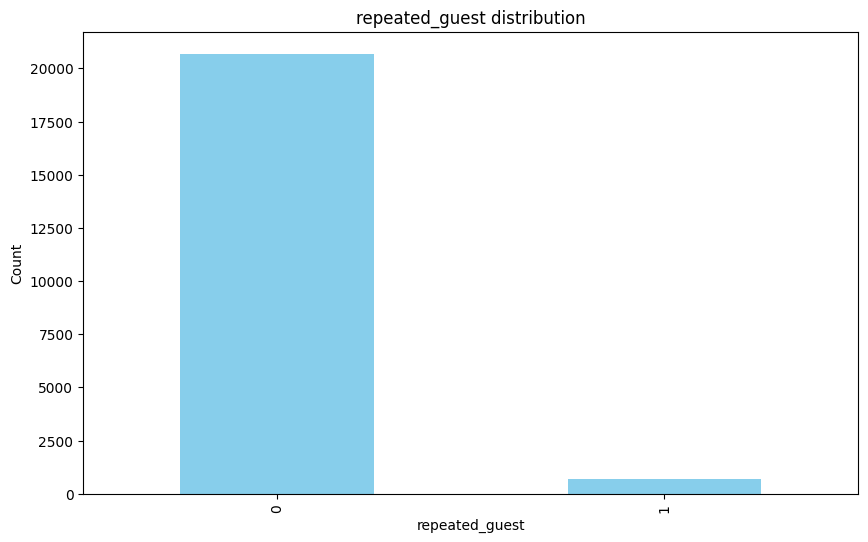

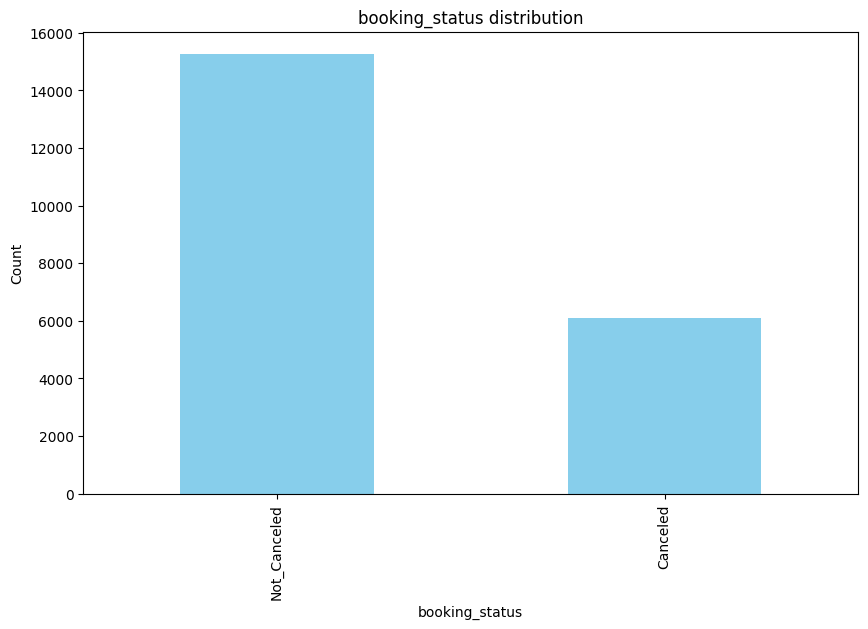

In [17]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"{cat_feature} distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

#### Bivariate Analysis

In [18]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes=axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette='Blues')
        axes[i].set_title(f"{column} vs {target}")

    plt.tight_layout()
    plt.show()

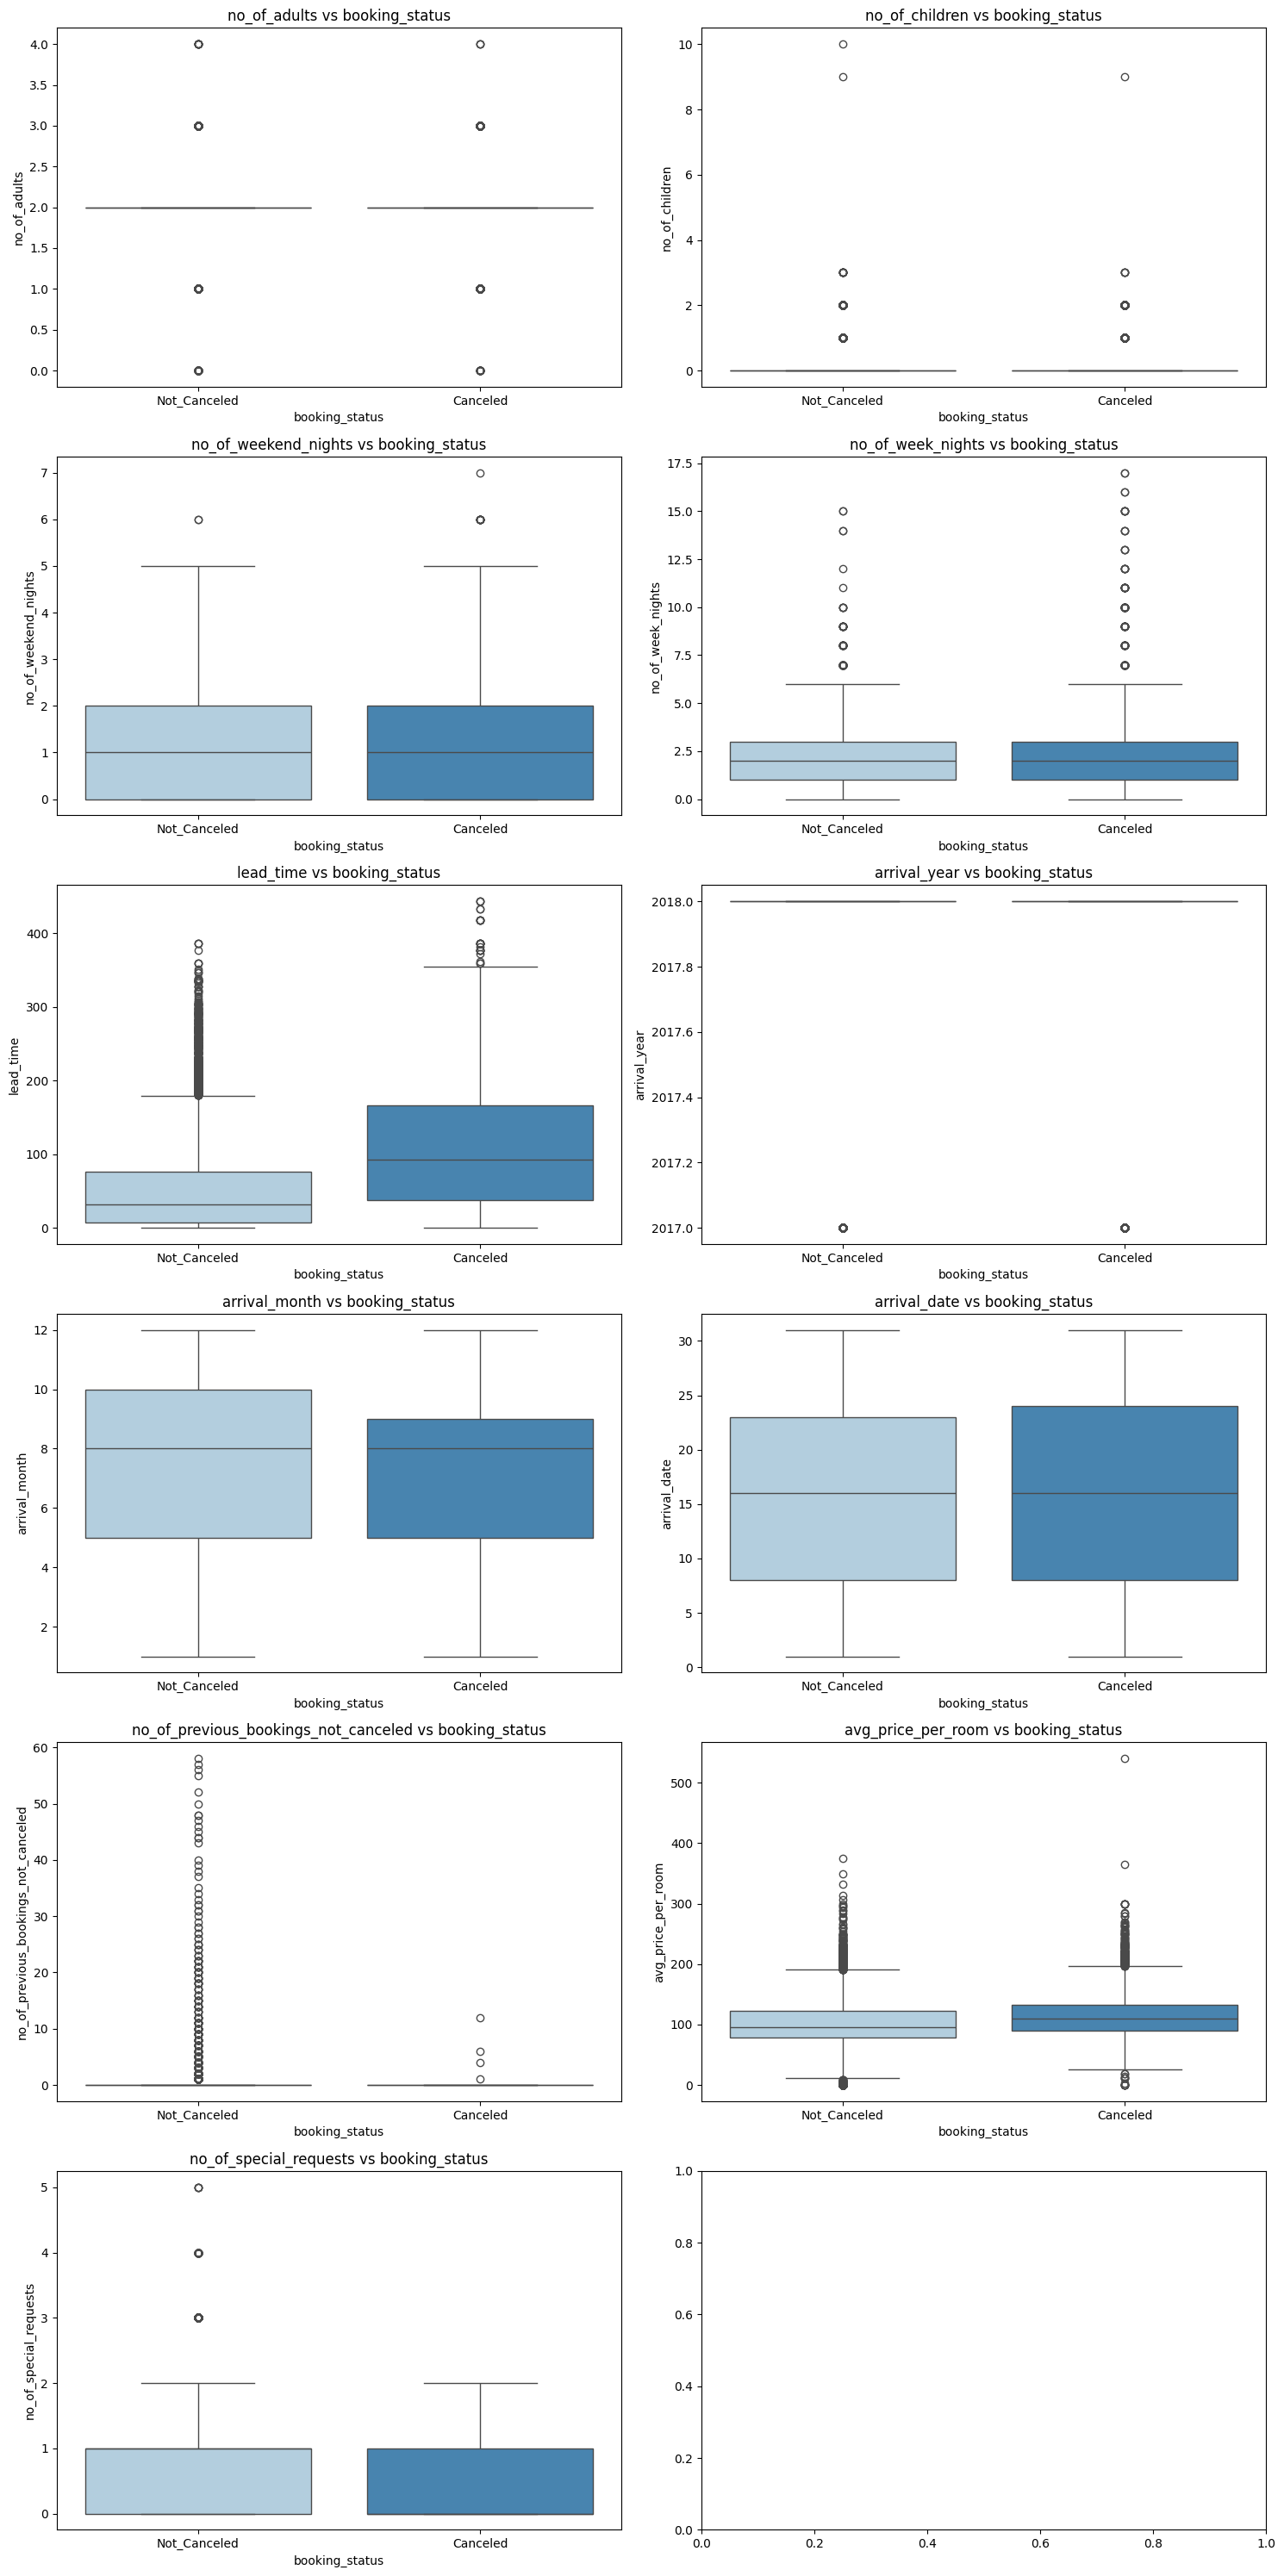

In [19]:
plot_bivariate_num(data, "booking_status", num_cols)

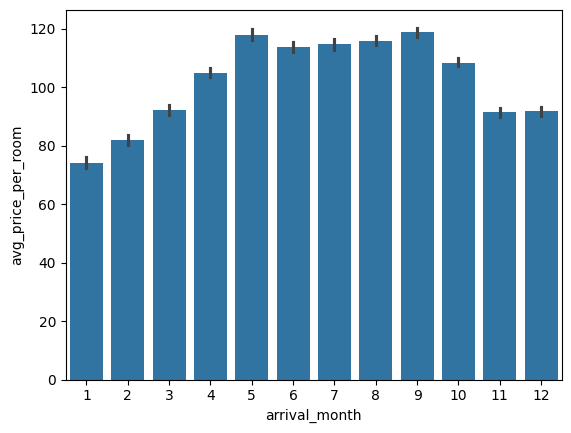

In [20]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data)
plt.show()

In [21]:
def plot_bivariate_cat(df, target, cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, features in enumerate(cat_features):
        sns.countplot(x=features, hue=target, data=df, palette='Set2', ax=axes[i])
        axes[i].set_title(f"{features} vs {target}")
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

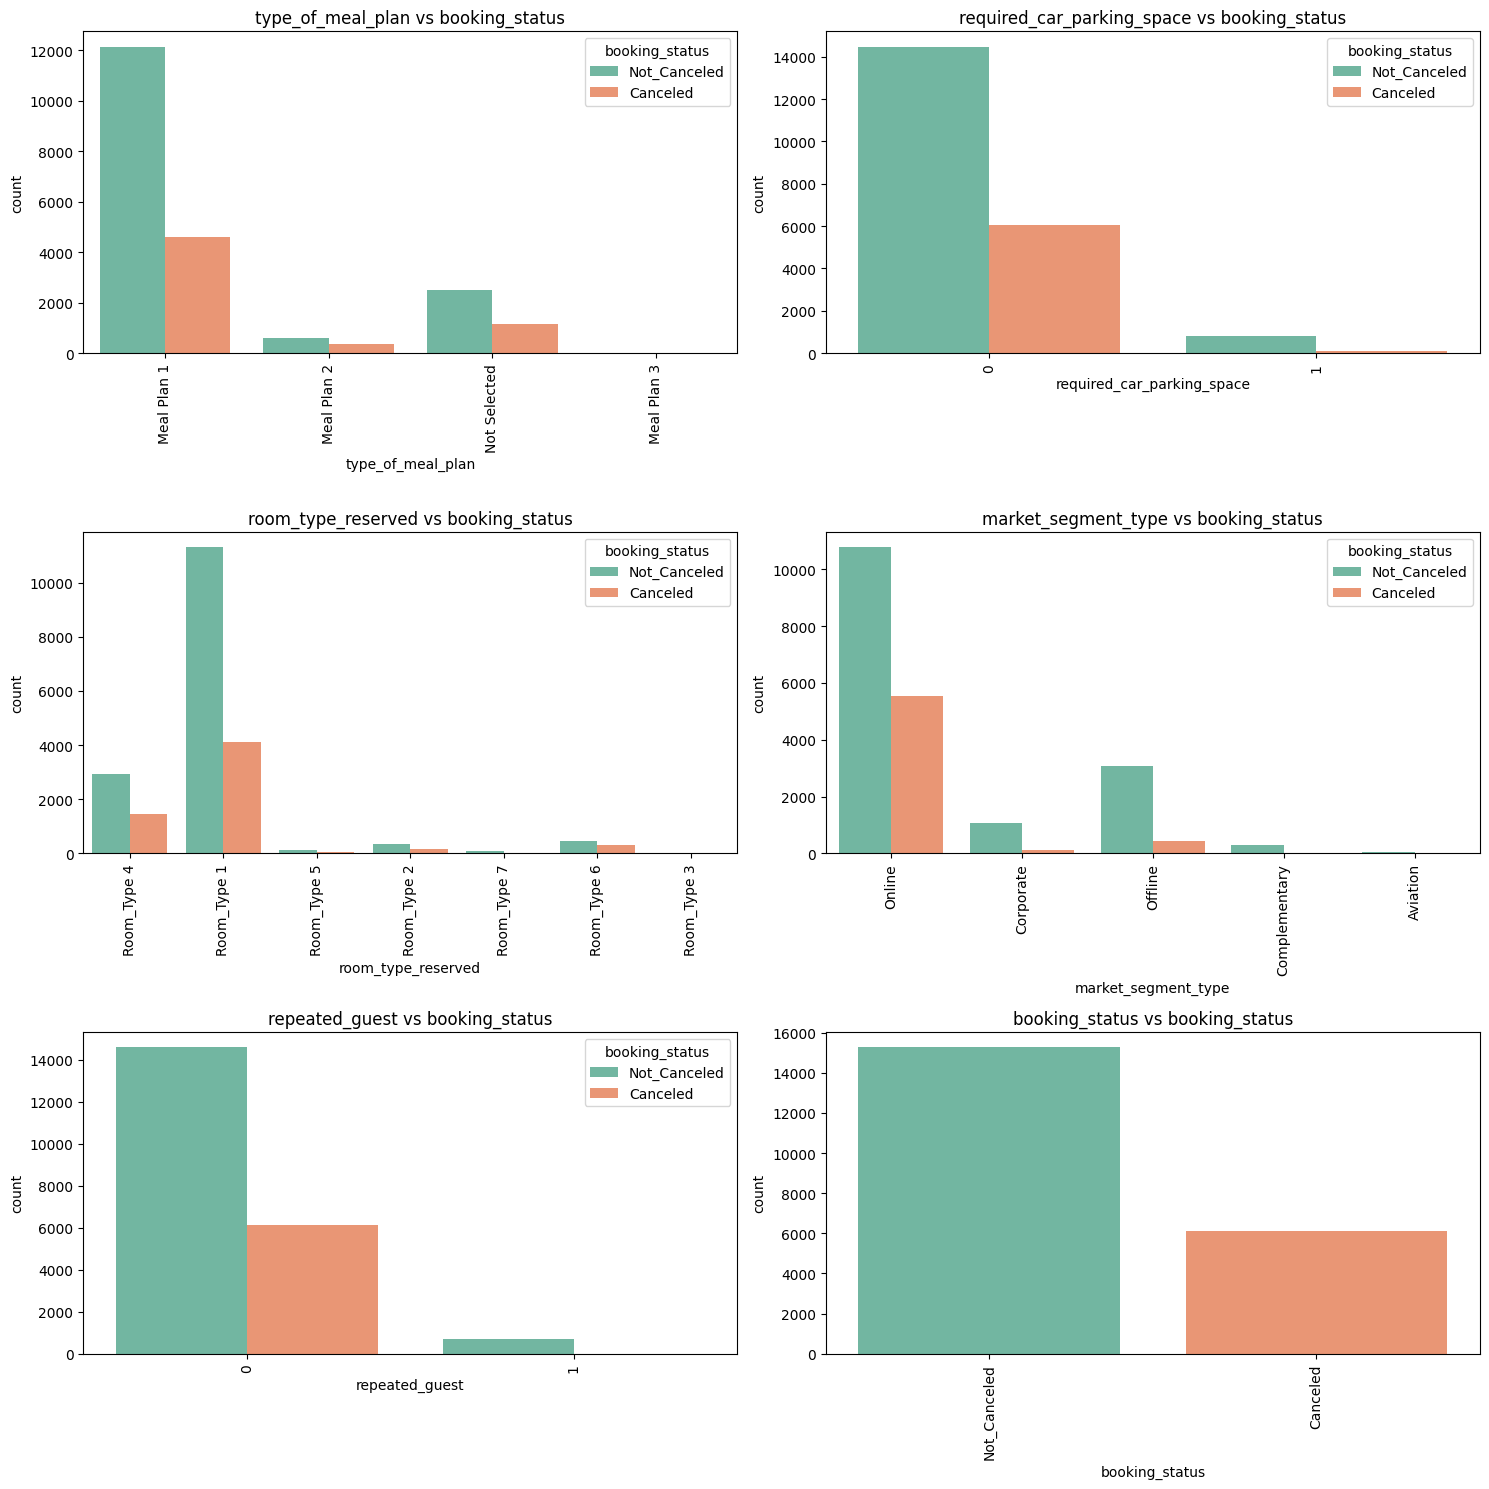

In [22]:
plot_bivariate_cat(data, 'booking_status', cat_cols)

#### Data Processing

In [23]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,3,0,0,2,Meal Plan 1,0,Room_Type 4,36,2018,7,20,Online,0,0,0,159.3,2,Not_Canceled
1,2,0,0,2,Meal Plan 1,0,Room_Type 1,86,2017,9,9,Corporate,0,0,0,100.0,0,Not_Canceled
2,2,0,1,3,Meal Plan 1,0,Room_Type 1,59,2018,8,29,Online,0,0,0,109.8,1,Not_Canceled
3,2,0,0,1,Meal Plan 1,0,Room_Type 1,9,2017,9,11,Online,0,0,0,105.0,2,Not_Canceled
4,2,0,1,2,Meal Plan 1,0,Room_Type 1,86,2018,5,20,Offline,0,0,0,65.0,1,Not_Canceled


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21389 entries, 0 to 29018
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21389 non-null  int64  
 1   no_of_children                        21389 non-null  int64  
 2   no_of_weekend_nights                  21389 non-null  int64  
 3   no_of_week_nights                     21389 non-null  int64  
 4   type_of_meal_plan                     21389 non-null  object 
 5   required_car_parking_space            21389 non-null  int64  
 6   room_type_reserved                    21389 non-null  object 
 7   lead_time                             21389 non-null  int64  
 8   arrival_year                          21389 non-null  int64  
 9   arrival_month                         21389 non-null  int64  
 10  arrival_date                          21389 non-null  int64  
 11  market_segment_type 

In [25]:
#### Label encoding
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [27]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [28]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,3,0,0,2,0,0,3,36,2018,7,20,4,0,0,0,159.3,2,1
1,2,0,0,2,0,0,0,86,2017,9,9,2,0,0,0,100.0,0,1
2,2,0,1,3,0,0,0,59,2018,8,29,4,0,0,0,109.8,1,1
3,2,0,0,1,0,0,0,9,2017,9,11,4,0,0,0,105.0,2,1
4,2,0,1,2,0,0,0,86,2018,5,20,3,0,0,0,65.0,1,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21389 entries, 0 to 29018
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21389 non-null  int64  
 1   no_of_children                        21389 non-null  int64  
 2   no_of_weekend_nights                  21389 non-null  int64  
 3   no_of_week_nights                     21389 non-null  int64  
 4   type_of_meal_plan                     21389 non-null  int64  
 5   required_car_parking_space            21389 non-null  int64  
 6   room_type_reserved                    21389 non-null  int64  
 7   lead_time                             21389 non-null  int64  
 8   arrival_year                          21389 non-null  int64  
 9   arrival_month                         21389 non-null  int64  
 10  arrival_date                          21389 non-null  int64  
 11  market_segment_type 

### Multicolliniarity

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [31]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,feature,VIF
0,const,4.106925e+07
1,no_of_adults,1.334168e+00
2,no_of_children,1.281710e+00
3,no_of_weekend_nights,1.075135e+00
4,no_of_week_nights,1.128190e+00
5,type_of_meal_plan,1.177706e+00
6,required_car_parking_space,1.032325e+00
7,room_type_reserved,1.558808e+00
8,lead_time,1.408019e+00
9,arrival_year,1.296406e+00


### Our data has no multi collianirity (all less than 6)

<Axes: >

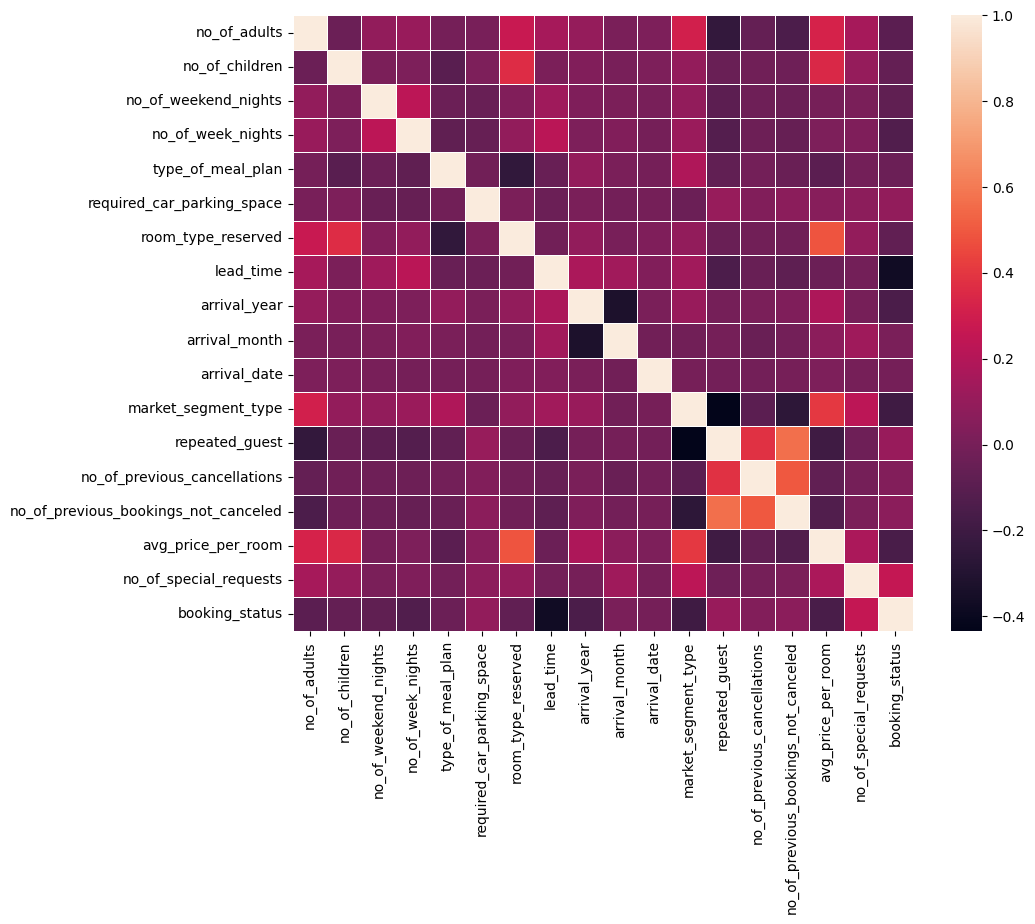

In [32]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, linewidths = 0.5)

### Skewness

In [33]:
skewness = df.skew()
skewness

no_of_adults                            -0.287425
no_of_children                           4.215482
no_of_weekend_nights                     0.652759
no_of_week_nights                        1.564576
type_of_meal_plan                        1.630814
required_car_parking_space               4.600011
room_type_reserved                       1.398623
lead_time                                1.410841
arrival_year                            -1.944375
arrival_month                           -0.295635
arrival_date                             0.006518
market_segment_type                     -2.323622
repeated_guest                           5.252944
no_of_previous_cancellations            21.963228
no_of_previous_bookings_not_canceled    16.101821
avg_price_per_room                       0.613318
no_of_special_requests                   0.918211
booking_status                          -0.947772
dtype: float64

In [34]:
for col in df.columns:
    if skewness[col]>5:
        df[col]=np.log1p(df[col])

In [35]:
skewness = df.skew()
skewness

no_of_adults                            -0.287425
no_of_children                           4.215482
no_of_weekend_nights                     0.652759
no_of_week_nights                        1.564576
type_of_meal_plan                        1.630814
required_car_parking_space               4.600011
room_type_reserved                       1.398623
lead_time                                1.410841
arrival_year                            -1.944375
arrival_month                           -0.295635
arrival_date                             0.006518
market_segment_type                     -2.323622
repeated_guest                           5.252944
no_of_previous_cancellations            13.253411
no_of_previous_bookings_not_canceled     7.528772
avg_price_per_room                       0.613318
no_of_special_requests                   0.918211
booking_status                          -0.947772
dtype: float64

### Imbalanced data

In [36]:
df["booking_status"].value_counts()

booking_status
1    15274
0     6115
Name: count, dtype: int64

In [37]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [38]:
y.value_counts()

booking_status
1    15274
0     6115
Name: count, dtype: int64

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

In [41]:
y_res.value_counts()

booking_status
1    15274
0    15274
Name: count, dtype: int64

In [42]:
df.shape

(21389, 18)

In [43]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"]= y_res
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,3,0,0,2,0,0,3,36,2018,7,20,4,0.0,0.0,0.0,159.3,2,1
1,2,0,0,2,0,0,0,86,2017,9,9,2,0.0,0.0,0.0,100.0,0,1
2,2,0,1,3,0,0,0,59,2018,8,29,4,0.0,0.0,0.0,109.8,1,1
3,2,0,0,1,0,0,0,9,2017,9,11,4,0.0,0.0,0.0,105.0,2,1
4,2,0,1,2,0,0,0,86,2018,5,20,3,0.0,0.0,0.0,65.0,1,1


In [44]:
balanced_df.shape

(30548, 18)

In [45]:
df = balanced_df.copy()

In [46]:
df.shape

(30548, 18)

### Feature selection

In [47]:
len(df.columns)

18

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [50]:
model = RandomForestClassifier()
model.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
feature_importance=model.feature_importances_

In [52]:
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
})

In [53]:
top_imp_df = feature_importance_df.sort_values(by="importance", ascending=False)

In [54]:
top_10_features = top_imp_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [55]:
top_10_df

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,36,2,159.300000,7,20,4,2,0,0,3,1
1,86,0,100.000000,9,9,2,2,0,0,0,1
2,59,1,109.800000,8,29,4,3,1,0,0,1
3,9,2,105.000000,9,11,4,1,0,0,0,1
4,86,1,65.000000,5,20,3,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
30543,17,0,139.463010,7,22,4,1,0,3,0,0
30544,36,0,131.668373,3,24,4,1,0,0,2,0
30545,334,0,75.431105,11,9,4,2,1,0,0,0
30546,97,0,94.500000,7,11,4,1,0,2,0,0


In [56]:
df = top_10_df.copy()

Model selection


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [58]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
classifiers = {
    "Random Forest" : RandomForestClassifier(),
    "LogisticRegression" : LogisticRegression(),
    "Gradient Adaboost" : GradientBoostingClassifier(),
    "Support vector classifier" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGBoost" : XGBClassifier(),
    "Adaboost" : AdaBoostClassifier(),
    "LGBM" : LGBMClassifier()
}

In [61]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [62]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

[LightGBM] [Info] Number of positive: 12246, number of negative: 12192
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 603
[LightGBM] [Info] Number of data points in the train set: 24438, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501105 -> initscore=0.004419
[LightGBM] [Info] Start training from score 0.004419


In [63]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.878723,0.876523,0.879128,0.877824
1,LogisticRegression,0.786579,0.802032,0.755945,0.778307
2,Gradient Adaboost,0.829296,0.812009,0.853038,0.832018
3,Support vector classifier,0.724550,0.729915,0.705086,0.717285
4,Decision Tree,0.830933,0.834619,0.821664,0.828091
5,KNN,0.780524,0.844145,0.683289,0.755247
6,Naive Bayes,0.769231,0.789549,0.728534,0.757815
7,XGBoost,0.865466,0.856958,0.874505,0.865642
8,Adaboost,0.798854,0.817284,0.765192,0.790380
9,LGBM,0.855646,0.837846,0.878798,0.857834


#### Train out RF model

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [65]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
rf = RandomForestClassifier()

In [68]:
# params_dist = {
#     'n_estimators': randint(100, 500),
#     'max_depth': randint(10, 50),
#     'min_samples_split': randint(2, 10),
#     'min_samples_leaf': randint(1, 5),
#     'bootstrap': [True, False]
# }

In [69]:
# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions= params_dist,
#     n_iter = 15,
#     cv=5,
#     verbose=2,
#     scoring='accuracy'
# )

In [70]:
# random_search.fit(X_train, y_train)

In [71]:
# random_search.best_params_

In [72]:
# best_rf_model = random_search.best_estimator_
# best_rf_model.set_params(
#     bootstrap=False,
#     max_depth=33,
#     min_samples_leaf=3,
#     min_samples_split=7,
#     n_estimators=408
# )
# best_rf_model.fit(X_train, y_train)

In [73]:
best_rf_model = RandomForestClassifier()
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [74]:
accuracy, precision, recall, f1

(0.8829787234042553,
 0.8835208471211119,
 0.8803165182987142,
 0.8819157720891825)

### Save this model

In [75]:
import joblib

joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [76]:
loaded = joblib.load("random_forest.pkl")

In [77]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
24774,52,0,90.9,3,29,4,1,0,0,0


In [78]:
new_data = np.array([141	,1	,195.25	,7,	10,	4	,2,	2	,1	,0]).reshape(1, -1)

In [79]:
predictions = loaded.predict(new_data)

In [80]:
predictions

array([1])